### DSC 478 - Programming Machine Learning A
### Team Project

#### Anwesh Ramesh

### June 7, 2024

### Dataset: Anime Recommendations Database

#### https://www.kaggle.com/code/hasibalmuzdadid/anime-ratings-analysis-recommender-system/input



### User-based Collaborative Filtering for Recommender System

In [1]:
# Import statements up to Week 9


import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
import re



# Numerical Operations and Data Manipulation 
import pandas as pd
import numpy as np
import numpy.linalg as la
from collections import Counter
import math
import random
 
# Linear Algebra and Matrix Operations
from scipy.sparse import csr_matrix
from scipy.linalg import svd
from scipy.sparse.linalg import svds

# Data Preprocessing and Machine Learning 
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import silhouette_samples, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, completeness_score, homogeneity_score
from sklearn.feature_extraction import DictVectorizer, text
from sklearn import preprocessing, model_selection, decomposition, feature_selection
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import graphviz
from IPython.display import Image


# Time-Related Functions
import time

# Miscellaneous
from operator import itemgetter, attrgetter
import importlib

## Loading data:


In [2]:
df = pd.read_csv('df_anime_rating.csv')


#df = pd.read_csv('df_anime_rating_subset.csv')


In [7]:
df.shape

(5247447, 53)

## Step 1: Data Understanding

In [5]:
df.head()

,anime_id,name,episodes,average_rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,...,genre_Vampire,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,user_id,user_rating
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,99,5
1,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,152,10
2,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,244,10
3,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,271,10
4,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,322,10


In [6]:
# Display basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 53 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   anime_id             1000000 non-null  int64  
 1   name                 1000000 non-null  object 
 2   episodes             1000000 non-null  int64  
 3   average_rating       1000000 non-null  float64
 4   members              1000000 non-null  int64  
 5   genre_Action         1000000 non-null  int64  
 6   genre_Adventure      1000000 non-null  int64  
 7   genre_Cars           1000000 non-null  int64  
 8   genre_Comedy         1000000 non-null  int64  
 9   genre_Dementia       1000000 non-null  int64  
 10  genre_Demons         1000000 non-null  int64  
 11  genre_Drama          1000000 non-null  int64  
 12  genre_Fantasy        1000000 non-null  int64  
 13  genre_Game           1000000 non-null  int64  
 14  genre_Historical     1000000 non-null  int64  
 15 

In [7]:
# Count missing values in each column
missing_values_anime = df.isna().sum()
missing_values_anime

anime_id               0
name                   0
episodes               0
average_rating         0
members                0
genre_Action           0
genre_Adventure        0
genre_Cars             0
genre_Comedy           0
genre_Dementia         0
genre_Demons           0
genre_Drama            0
genre_Fantasy          0
genre_Game             0
genre_Historical       0
genre_Horror           0
genre_Josei            0
genre_Kids             0
genre_Magic            0
genre_Martial Arts     0
genre_Mecha            0
genre_Military         0
genre_Music            0
genre_Mystery          0
genre_Parody           0
genre_Police           0
genre_Psychological    0
genre_Romance          0
genre_Samurai          0
genre_School           0
genre_Sci-Fi           0
genre_Seinen           0
genre_Shoujo           0
genre_Shoujo Ai        0
genre_Shounen          0
genre_Shounen Ai       0
genre_Slice of Life    0
genre_Space            0
genre_Sports           0
genre_Super Power      0


In [5]:
df.describe()

,anime_id,episodes,average_rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,...,genre_Vampire,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,user_id,user_rating
count,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,...,500000.000000,500000.000000,500000.0,500000.0,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000
mean,8643.715700,25.514320,8.796194,4.385483e+05,0.451434,0.247694,0.0,0.276328,0.0,0.000546,...,0.023104,0.199232,0.0,0.0,0.024752,0.005050,0.770966,0.0,36170.048264,8.889368
std,9434.996651,28.729977,0.198522,2.674341e+05,0.497636,0.431674,0.0,0.447181,0.0,0.023360,...,0.150234,0.399423,0.0,0.0,0.155369,0.070884,0.420212,0.0,21086.473160,1.177850
min,1.000000,1.000000,8.540000,1.110400e+04,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.000000
25%,1535.000000,11.000000,8.640000,2.059590e+05,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,18241.000000,8.000000
50%,5114.000000,24.000000,8.770000,4.163970e+05,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,35598.500000,9.000000
75%,12355.000000,26.000000,8.920000,5.728880e+05,1.000000,0.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,54268.000000,10.000000
max,32935.000000,201.000000,9.370000,1.013917e+06,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,73515.000000,10.000000


## Step 2: Exploratory Data Analysis (EDA) 

Interpretation of EDA Results
2.1 Distribution of User Ratings
The histogram shows that the majority of user ratings are between 6 and 10, with the highest frequency around 8. This suggests that users tend to rate animes positively, and ratings below 4 are relatively rare.

2.2 Top 20 Most Rated Animes
The bar chart indicates the most rated animes, with "Death Note" having the highest number of ratings, followed by "Sword Art Online" and "Shingeki no Kyojin." These animes are popular among users, leading to higher engagement and ratings.

2.3 Distribution of Number of Ratings per User
The histogram demonstrates that most users have rated fewer than 500 animes, with a steep drop-off after that. This suggests that while some users are highly active, the majority have rated only a small number of animes.

### 2.1 Visualize Rating Distributions


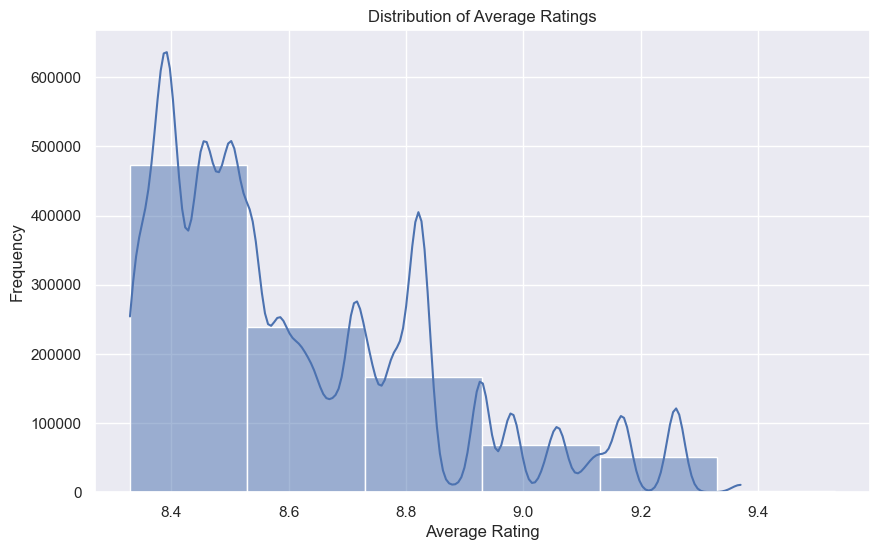

In [198]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], kde=True, binwidth=0.2)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

### 2.2 Analyze User Rating Behavior
### Visualize the distribution of the number of ratings per user.

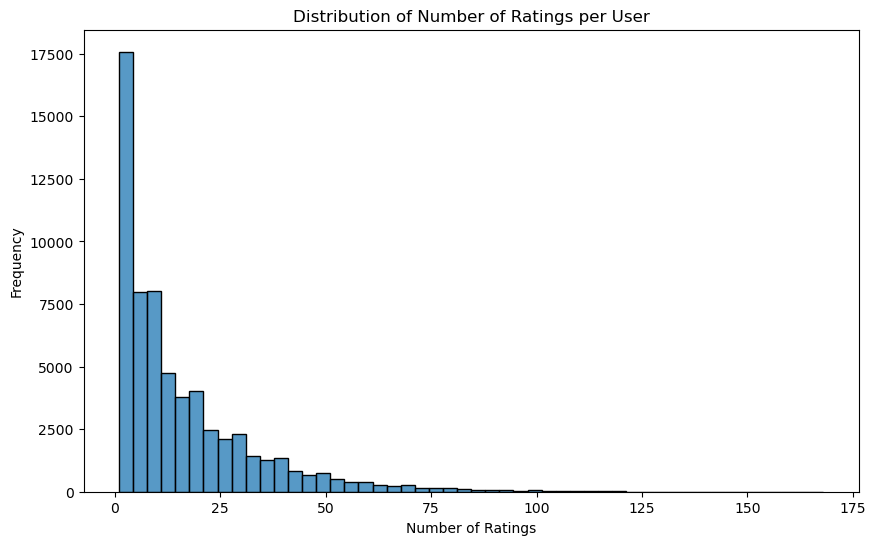

In [11]:
# Group by user and count the number of ratings
user_ratings = df.groupby('user_id')['user_rating'].count()

# Plot the distribution of the number of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings, bins=50, kde=False)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

## Step 3
### Transforming the data and Normalizing

In [5]:
# Subset of the table showing user_id, anime_id, user_rating
# Pivot table to create a utility matrix of users and anime ratings
rating_matrix = df.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)



In [9]:
rating_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62337 entries, 2 to 73515
Columns: 190 entries, 1 to 34240
dtypes: float64(190)
memory usage: 90.8 MB


To center the data around zero which aids computation of similarity measures and compensate relative varience in user rating scales.

In [10]:
# Normalize the data by subtracting the mean ratings of each user
normalized_matrix = rating_matrix.sub(rating_matrix.mean(axis=1), axis=0)

# Convert the normalized matrix into a sparse matrix format
sparse_matrix = csr_matrix(normalized_matrix.values)


### SVD for Dimensional Reduction
#### Reconstructing the matrix to predict missing values

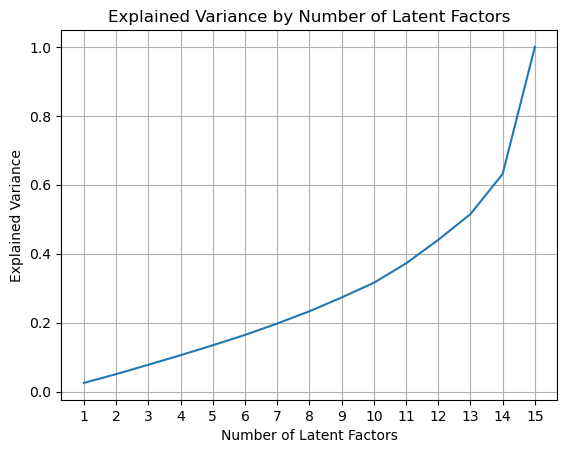

In [13]:
# Performing SVD
U, sigma, Vt = svds(sparse_matrix, k = 15)

# Converting sigma to a diagonal matrix
sigma = np.diag(sigma)

# Creating explained_variance() to calculate the explained variance
def explained_variance(sigma, k):
    return np.sum(sigma[:k] ** 2) / np.sum(sigma ** 2)

# Determining optimal number of latent factors
variances = [explained_variance(sigma, k) for k in range(1, len(sigma) + 1)]

plt.plot(range(1, len(sigma) + 1), variances)
plt.xlabel('Number of Latent Factors')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Latent Factors')
plt.xticks(range(1, len(sigma) + 1, 1))
plt.grid(True)
plt.show()

### Based on the results from our teams Clustering and Cross-Validation performed by Ken (which is presented in the notebook) we will be using K=10. 

### Applying SVD and reconstructing Matrix

In [7]:
# Creating function for applying svd and reconstructing matrix with K=10.
def svd_re(sparse_matrix, rating_matrix, k):
    # Perform SVD
    U, sigma, Vt = svds(sparse_matrix, k=10)
    # Convert sigma to diagonal 
    sigma = np.diag(sigma)
    # Reconstruct
    reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)
    # Formating reconstructing matrix as a Dataframe while 
    #retaining index and column from rating matrix 
    svd_matrix = pd.DataFrame(reconstructed_matrix, 
                              index = rating_matrix.index, 
                              columns = rating_matrix.columns)
    return svd_matrix

Compressed Sparse Row (CSR) matrix. Sparse matrices are more 
efficient in terms of storage and processing when dealing with 
large datasets that contain a lot of zero values.

### Function to fit NearestNeighbors model

In [8]:
def fitknnm(svd_matrix):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(svd_matrix)
    return model_knn

### Function to Extract Genres for the recommended animes. 

In [9]:
def extract_genres(anime_name):
    
    # List that stores the genre(s) over all columns in the DataFrame that have 'genre_'
    genres = [
        # Removing prefix 'genre_' from the column name
        col.replace('genre_', '')  
        for col in df.columns
        if col.startswith('genre_')  # Check if the column name starts with 'genre_'
        and df.loc[df['name'] == anime_name, col].values[0] == 1  # Check if the anime has this genre (value is 1)
    ]
    
    # Joining the genres with a comma and returning it a string
    return ', '.join(genres)


### Function that generated user based recommendation

In [23]:
# Function to make recommendations for a given user
def recommend_for_user(user_id, model_knn, rating_matrix):
    
    # If the user_id is unavailable in the dataset
    if user_id not in rating_matrix.index:
        raise ValueError(f"User '{user_id}' not found in the dataset.")
        
    # Get the index of the user in the matrix
    user_index = rating_matrix.index.get_loc(user_id)
    
    # Find the 5 nearest neighbors (most similar users)
    distances, indices = model_knn.kneighbors(rating_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=5)
    
    # Exclude the first result because it's the user itself
    similar_users_indices = indices.flatten()[1:]
    similar_users_distances = distances.flatten()[1:]
    
    # Calculate the predicted ratings using a weighted sum of ratings
    # Weights are the similarity scores (cosine distances)
    sim_scores = 1 - similar_users_distances  # Transform distance to similarity score
    user_ratings = normalized_matrix.iloc[similar_users_indices]
    weighted_ratings = user_ratings.mul(sim_scores, axis=0).sum(axis=0) / sim_scores.sum()
    
    # Add the user mean back to de-normalize the data
    user_mean = rating_matrix.loc[user_id].mean()
    predicted_ratings = user_mean + weighted_ratings
    pr = predicted_ratings
    # Create a DataFrame from predicted ratings
    predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=['predicted_rating'])
    
    # Merge with anime names
    predicted_ratings_df = predicted_ratings_df.merge(df[['anime_id', 'name']].drop_duplicates(), left_index=True, right_on='anime_id')
    # Filter to anime not yet rated by the user and sort them
    rated_anime = rating_matrix.loc[user_id] > 0
    recommendations = predicted_ratings_df.loc[~predicted_ratings_df['anime_id'].isin(rated_anime[rated_anime].index)]
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)
    genres = []
    for names in recommendations['name']:
        genres.append(extract_genres(names))
    recommendations['Genres'] =  genres
    
    # Get 5 animes rated by the user.
    user_ratings_df = predicted_ratings_df.merge(df[['anime_id', 'name','user_rating']].drop_duplicates(), left_index=True, right_on='anime_id')
    rated_by_user = df[df['user_id'] == user_id][['anime_id', 'name', 'user_rating']].head(5)
    genres = []
    for names in rated_by_user['name']:
        genres.append(extract_genres(names))
    rated_by_user['Genres'] =  genres
    
    return recommendations.head(5), rated_by_user.head(5)




# IMPLEMENTATION

## Create the Utility matrix and sparse matrices for subsets or the full dataset. Apply SVD to dataset  with    K = 10 to reconstruct the matrix and fit NearestNeighbors model.

In [18]:
# Pivot table to create a utility matrix of users and anime ratings
rating_matrix = df.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)

# Normalize the data by subtracting the mean ratings of each user
normalized_matrix = rating_matrix.sub(rating_matrix.mean(axis=1), axis=0)

# Convert the normalized matrix into a sparse matrix format
sparse_matrix = csr_matrix(normalized_matrix.values)


In [19]:
svd_matrix = svd_re(sparse_matrix, rating_matrix, 10)

knn_re = fitknnm(svd_matrix)

In [24]:
rec, rat = recommend_for_user(2867, knn_re, rating_matrix)
print(f'Animes rated by user 2867 :')
display(rat)
print(f'Anime recommendations for user 2867: ')
display(rec)

Animes rated by user 2867 :


,anime_id,name,user_rating,Genres
78,32281,Kimi no Na wa.,10,"Drama, Romance, School, Supernatural"
2890,5114,Fullmetal Alchemist: Brotherhood,7,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
25417,9253,Steins;Gate,8,"Sci-Fi, Thriller"
46272,11061,Hunter x Hunter (2011),8,"Action, Adventure, Shounen, Super Power"
59171,4181,Clannad: After Story,7,"Drama, Fantasy, Romance, Slice of Life, Supern..."


Anime recommendations for user 2867: 


,predicted_rating,anime_id,name,Genres
691956,8.221839,28701,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Fantasy, Magic, Shounen, Supernatural"
78316,7.967434,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
628218,7.472417,12531,Sakamichi no Apollon,"Drama, Josei, Music, Romance, School"
951734,7.470370,16782,Kotonoha no Niwa,"Drama, Psychological, Romance, Slice of Life"
396507,6.488641,11577,Steins;Gate Movie: Fuka Ryouiki no Deja vu,"Sci-Fi, Thriller"


In [25]:
# Example user-ids

uids = [47652, 2867, 2015, 1987, 1620, 1522, 152, 784]
for ids in uids:
    print(f'The recommendations for user {ids} based on similar users: ')
    recommendations = recommend_for_user(ids, knn_re, rating_matrix)
    display(recommendations)

The recommendations for user 47652 based on similar users: 


,predicted_rating,anime_id,name,Genres
58500,9.161159,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern..."
808616,8.407497,1210,NHK ni Youkoso!,"Comedy, Drama, Psychological, Romance"
981355,8.155921,28223,Death Parade,"Drama, Game, Mystery, Psychological, Thriller"
231825,7.418932,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi"
225694,7.157116,457,Mushishi,"Adventure, Fantasy, Historical, Mystery, Seine..."


The recommendations for user 2867 based on similar users: 


,predicted_rating,anime_id,name,Genres
691956,8.221839,28701,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Fantasy, Magic, Shounen, Supernatural"
78316,7.967434,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
628218,7.472417,12531,Sakamichi no Apollon,"Drama, Josei, Music, Romance, School"
951734,7.470370,16782,Kotonoha no Niwa,"Drama, Psychological, Romance, Slice of Life"
396507,6.488641,11577,Steins;Gate Movie: Fuka Ryouiki no Deja vu,"Sci-Fi, Thriller"


The recommendations for user 2015 based on similar users: 


,predicted_rating,anime_id,name,Genres
185271,9.356225,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."
565688,5.862641,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi"
577667,4.599424,22789,Barakamon,"Comedy, Slice of Life"
584088,4.099681,18115,Magi: The Kingdom of Magic,"Action, Adventure, Fantasy, Magic, Shounen"
410469,2.623208,7472,Gintama Movie: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S..."


The recommendations for user 1987 based on similar users: 


,predicted_rating,anime_id,name,Genres
396507,10.207096,11577,Steins;Gate Movie: Fuka Ryouiki no Deja vu,"Sci-Fi, Thriller"
685731,9.457215,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller"
352514,4.707485,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural"
371461,3.221078,4565,Tengen Toppa Gurren Lagann Movie: Lagann-hen,"Action, Mecha, Sci-Fi, Space, Super Power"
331303,3.206448,30654,Ansatsu Kyoushitsu (TV) 2nd Season,"Action, Comedy, School, Shounen"


The recommendations for user 1620 based on similar users: 


,predicted_rating,anime_id,name,Genres
471350,9.348401,2251,Baccano!,"Action, Comedy, Historical, Mystery, Seinen, S..."
925014,9.099378,31964,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power"
45947,7.102734,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power"
772052,6.606427,1889,Higurashi no Naku Koro ni Kai,"Mystery, Psychological, Supernatural, Thriller"
521002,6.091770,13125,Shinsekai yori,"Drama, Horror, Mystery, Sci-Fi, Supernatural"


The recommendations for user 1522 based on similar users: 


,predicted_rating,anime_id,name,Genres
685731,7.694193,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller"
453502,7.694179,17389,Kingdom 2nd Season,"Action, Historical, Military, Seinen"
583364,7.444693,30230,Diamond no Ace: Second Season,"Comedy, School, Shounen, Sports"
906539,6.948857,1604,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power"
925014,6.945679,31964,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power"


The recommendations for user 152 based on similar users: 


,predicted_rating,anime_id,name,Genres
514371,8.175063,3784,Evangelion: 2.0 You Can (Not) Advance,"Action, Mecha, Sci-Fi"
914833,7.672479,2966,Ookami to Koushinryou,"Adventure, Fantasy, Historical, Romance"
185271,7.422557,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."
642876,6.435159,467,Ghost in the Shell: Stand Alone Complex,"Action, Mecha, Military, Police, Sci-Fi, Seinen"
610982,5.929560,11979,Mahou Shoujo MadokaMagica Movie 2: Eien no Mon...,"Drama, Magic, Psychological, Thriller"


The recommendations for user 784 based on similar users: 


,predicted_rating,anime_id,name,Genres
685731,7.935856,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller"
606363,5.687052,6594,Katanagatari,"Action, Adventure, Historical, Martial Arts, R..."
914833,5.437570,2966,Ookami to Koushinryou,"Adventure, Fantasy, Historical, Romance"
278269,5.437570,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller"
676559,5.188088,5341,Ookami to Koushinryou II,"Adventure, Fantasy, Historical, Romance"


### Exploring subsets of Data 

In [17]:
# Exploring data to identify a proper threshold

# Calculating the number of ratings per user_id
user_rating_counts = df.groupby('user_id').size()

# Finding the number of of users who have rated only once
num_users_rated_once = user_rating_counts[user_rating_counts == 1].count()
print(f'Number of users who have rated only once: {num_users_rated_once}')

Number of users who have rated only once: 3395


In [79]:
# Finding the number of of users who have rated more than 10
num_users_rated_once = user_rating_counts[user_rating_counts >= 10].count()
print(f'Number of users who have rated more than 10: {num_users_rated_once}')

Number of users who have rated more than 10: 53682


In [16]:
# Finding the number of of users who have rated more than 20
num_users_rated_once = user_rating_counts[user_rating_counts >= 20].count()
print(f'Number of users who have rated more than 20: {num_users_rated_once}')

Number of users who have rated more than 20: 45156


In [84]:
# Finding the number of of users who have rated more than 30
num_users_rated_once = user_rating_counts[user_rating_counts >= 30].count()
print(f'Number of users who have rated more than 30: {num_users_rated_once}')

Number of users who have rated more than 30: 38986


In [85]:
# Finding the number of of users who have rated more than 40
num_users_rated_once = user_rating_counts[user_rating_counts >= 40].count()
print(f'Number of users who have rated more than 40: {num_users_rated_once}')

Number of users who have rated more than 40: 34064


### Filtering Dataset based on the threshold of ratings
#### User User Similartiy would improve if all the users have at least rated 20 animes

In [26]:
# Filter the dataset and try Item-Based Collaborative Filtering again

# Filtering users with at least min_ratings
# Counting the number of ratings for each user and store it in selected_users
selected_users = df['user_id'].value_counts()


# Filtering the DataFrame to include only users who have at least min_ratings
# The 'isin' method checks if the user_id is in the list of users with at least min_ratings
df_filtered = df[df['user_id'].isin(selected_users[selected_users >= 40].index)]

In [27]:
df_filtered.shape

(4744622, 53)

### Generate recommendations for user based on the filtered dataset

In [27]:
# Subset of the table showing user_id, anime_id, user_rating
# Pivot table to create a utility matrix of users and anime ratings
rating_matrix = df_filtered.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)

# Normalize the data by subtracting the mean ratings of each user
normalized_matrix = rating_matrix.sub(rating_matrix.mean(axis=1), axis=0)

# Convert the normalized matrix into a sparse matrix format
sparse_matrix = csr_matrix(normalized_matrix.values)


In [28]:
svd_matrix = svd_re(sparse_matrix, rating_matrix, 10)

knn_re = fitknnm(svd_matrix)

In [16]:
# Example recommendation with 5 animes the user rated already. 47652, 2867, 2015, 1987, 1620, 1522, 152, 784
rec, rated = recommend_for_user(47652 ,knn_re,rating_matrix)
print(f'The animes rated by user 47652: ')
display(rated)
print('The recommendations for user 47652 based on similar users: ')
display(rec)

The animes rated by user 47652: 


,anime_id,name,user_rating,Genres
1308,32281,Kimi no Na wa.,7,"Drama, Romance, School, Supernatural"
16604,5114,Fullmetal Alchemist: Brotherhood,9,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
36694,9253,Steins;Gate,10,"Sci-Fi, Thriller"
91851,2904,Code Geass: Hangyaku no Lelouch R2,7,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
114746,199,Sen to Chihiro no Kamikakushi,9,"Adventure, Drama, Supernatural"


The recommendations for user 47652 based on similar users: 


,predicted_rating,anime_id,name,Genres
698543,9.520659,32,Neon Genesis Evangelion: The End of Evangelion,"Dementia, Drama, Mecha, Psychological, Sci-Fi"
231825,8.518963,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi"
808616,8.334528,1210,NHK ni Youkoso!,"Comedy, Drama, Psychological, Romance"
58500,7.972777,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern..."
632333,6.705160,523,Tonari no Totoro,"Adventure, Comedy, Supernatural"
981355,6.693645,28223,Death Parade,"Drama, Game, Mystery, Psychological, Thriller"
341664,5.503908,4282,Kara no Kyoukai 5: Mujun Rasen,"Action, Drama, Mystery, Romance, Supernatural,..."
755453,5.428547,22297,Fate/stay night: Unlimited Blade Works,"Action, Fantasy, Magic, Shounen, Supernatural"
521002,5.067458,13125,Shinsekai yori,"Drama, Horror, Mystery, Sci-Fi, Supernatural"
360505,4.785628,7785,Yojouhan Shinwa Taikei,"Mystery, Psychological, Romance"


In [ ]:
# Example recommendation with 5 animes the user rated already. 47652, 2867, 2015, 1987, 1620, 1522, 152, 784
rec, rated = recommend_for_user(2867 ,knn_re,rating_matrix)

In [30]:
print(f'The animes rated by user 2867: ')
display(rated)
print('The recommendations for user 2867 based on similar users run on subset of data: ')
display(rec)

The animes rated by user 2867: 


,anime_id,name,user_rating,Genres
78,32281,Kimi no Na wa.,10,"Drama, Romance, School, Supernatural"
2890,5114,Fullmetal Alchemist: Brotherhood,7,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
25417,9253,Steins;Gate,8,"Sci-Fi, Thriller"
46272,11061,Hunter x Hunter (2011),8,"Action, Adventure, Shounen, Super Power"
59171,4181,Clannad: After Story,7,"Drama, Fantasy, Romance, Slice of Life, Supern..."


The recommendations for user 2867 based on similar users run on subset of data: 


,predicted_rating,anime_id,name,Genres
78316,9.684188,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
231825,9.195571,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi"
348925,6.916461,22135,Ping Pong The Animation,"Psychological, Seinen, Sports"
102751,6.461650,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural"
396507,6.416697,11577,Steins;Gate Movie: Fuka Ryouiki no Deja vu,"Sci-Fi, Thriller"


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_predicted_ratings(user_id, model_knn, rating_matrix):
    if user_id not in rating_matrix.index:
        return None
    
    user_index = rating_matrix.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(rating_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)
    
    similar_users_indices = indices.flatten()[1:]
    similar_users_distances = distances.flatten()[1:]
    sim_scores = 1 - similar_users_distances
    
    user_ratings = rating_matrix.iloc[similar_users_indices]
    weighted_ratings = user_ratings.mul(sim_scores, axis=0).sum(axis=0) / sim_scores.sum()
    
    user_mean = rating_matrix.loc[user_id].mean()
    predicted_ratings = user_mean + weighted_ratings
    
    return predicted_ratings


In [33]:
def evaluate_predictions(model_knn, rating_matrix):
    all_actual = []
    all_predicted = []
    
    for user_id in rating_matrix.index:
        actual_ratings = rating_matrix.loc[user_id]
        predicted_ratings = get_predicted_ratings(user_id, model_knn, rating_matrix)
        
        if predicted_ratings is not None:
            valid_mask = actual_ratings.notna() & (actual_ratings > 0) 
            all_actual.extend(actual_ratings[valid_mask])
            all_predicted.extend(predicted_ratings[valid_mask])
    
    mae = mean_absolute_error(all_actual, all_predicted)
    rmse = np.sqrt(mean_squared_error(all_actual, all_predicted))
    
    return mae, rmse

mae, rmse = evaluate_predictions(knn_re, rating_matrix)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Absolute Error: 0.1673
Root Mean Square Error: 0.3734
